# Analisis de Datos del Grupo H
## Universidad Del Cine y Universidad De Buenos Aires



In [1]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

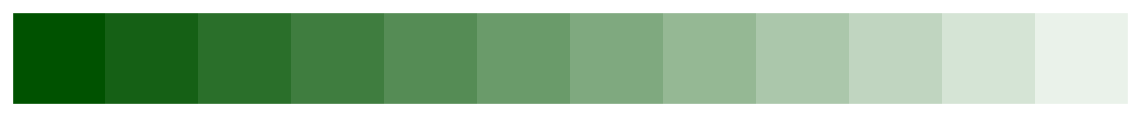

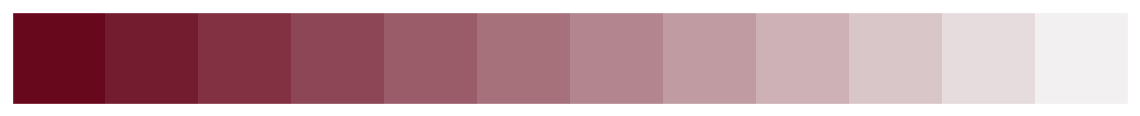

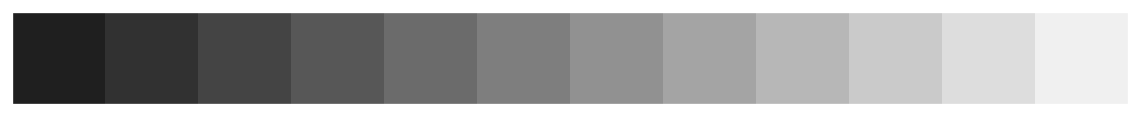

In [2]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)


In [3]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoH_UBA'
university1_name = 'Universidad De Buenos Aires'

university2 = 'GrupoH_Cine'
university2_name = 'Universidad Del Cine'

In [4]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',', index_col=0)
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',', index_col=0)

In [5]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [6]:
df_1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad de buenos aires,actuario,2020-09-24,amy,wallace,female,1,8431,el hoyo,brookejones@yahoo.com
1,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,3151,antelo,cpatterson@yahoo.com
2,universidad de buenos aires,medicina,2020-10-18,jessica,sandoval,female,77,6601,altamira,melinda04@hotmail.com
3,universidad de buenos aires,licenciatura en ciencias antropológicas,2020-09-20,david,cooper,male,93,6105,cañada seca,lukegutierrez@yahoo.com
4,universidad de buenos aires,licenciatura en kinesiología y fisiatría,2020-12-12,benjamin,nicholson,male,54,5345,baños termales,bgonzalez@hotmail.com


In [7]:
df_2.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad del cine,ciencias veterinarias,2020-12-31,stacey,medina,female,63,9037,aldea beleiro,sarahpham@yahoo.com
1,universidad del cine,licenciatura en producción de bioimagenes,2020-10-29,kathryn,nichols,female,13,8142,colonia barga,christopheranderson@yahoo.com
2,universidad del cine,licenciatura en ciencias de la computación,2021-01-01,eric,kane,male,13,1754,san justo,james27@yahoo.com
3,universidad del cine,ingeniería en informática,2020-09-17,jerry,beasley,male,32,3340,boqueron,brownmichael@gmail.com
4,universidad del cine,arquitectura,2020-10-29,darrell,chapman,male,62,5611,agua rica,cthomas@hotmail.com


In [8]:
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')

In [9]:
df_geonames.dropna(axis=1, inplace=True)

In [10]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [11]:
df_geonames.head()

,country,postal_code,location,region,type,lat,lon,type_2
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,-25.7833,-64.5000,4
2,AR,4126,BRETE,Salta,A,-26.0667,-65.3667,4
3,AR,4126,CEIBAL,Salta,A,-26.1000,-65.0167,4
4,AR,4126,RUIZ DE LOS LLANOS,Salta,A,-26.1167,-65.2833,4


In [12]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')

In [13]:
df_1geonames_merge.head()

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,8431,HOYO DE EPUYEN,Chubut,U,-42.0667,-71.5000,4.0,universidad de buenos aires,actuario,2020-09-24,amy,wallace,female,1,el hoyo,brookejones@yahoo.com
1,AR,8431,EL HOYO,Chubut,U,-42.0667,-71.5000,3.0,universidad de buenos aires,actuario,2020-09-24,amy,wallace,female,1,el hoyo,brookejones@yahoo.com
2,AR,3151,COLONIA ANGELA,Entre Rios,E,-32.3889,-59.9333,3.0,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,antelo,cpatterson@yahoo.com
3,AR,3151,CRUCECITAS 3ª SECCION,Entre Rios,E,-32.3889,-59.9333,3.0,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,antelo,cpatterson@yahoo.com
4,AR,3151,KILOMETRO 148 (APEADERO FCGU),Entre Rios,E,-32.3889,-59.9333,3.0,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,antelo,cpatterson@yahoo.com


In [14]:
df_2geonames_merge.head()

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,9037,ALTO RIO MAYO,Chubut,U,-45.550,-71.30,4.0,universidad del cine,ciencias veterinarias,2020-12-31,stacey,medina,female,63,aldea beleiro,sarahpham@yahoo.com
1,AR,9037,ALDEA BELEIRO,Chubut,U,-45.550,-71.30,3.0,universidad del cine,ciencias veterinarias,2020-12-31,stacey,medina,female,63,aldea beleiro,sarahpham@yahoo.com
2,AR,8142,PUERTO COLOMA,Buenos Aires,B,-39.475,-62.65,3.0,universidad del cine,licenciatura en producción de bioimagenes,2020-10-29,kathryn,nichols,female,13,colonia barga,christopheranderson@yahoo.com
3,AR,8142,SAN ADOLFO,Buenos Aires,B,-39.475,-62.65,3.0,universidad del cine,licenciatura en producción de bioimagenes,2020-10-29,kathryn,nichols,female,13,colonia barga,christopheranderson@yahoo.com
4,AR,8142,COLONIA EL GUANACO,Buenos Aires,B,-39.475,-62.65,3.0,universidad del cine,licenciatura en producción de bioimagenes,2020-10-29,kathryn,nichols,female,13,colonia barga,christopheranderson@yahoo.com


## TOP 10 de universidades con más alumnos

/tmp/ipykernel_4495/3717448754.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


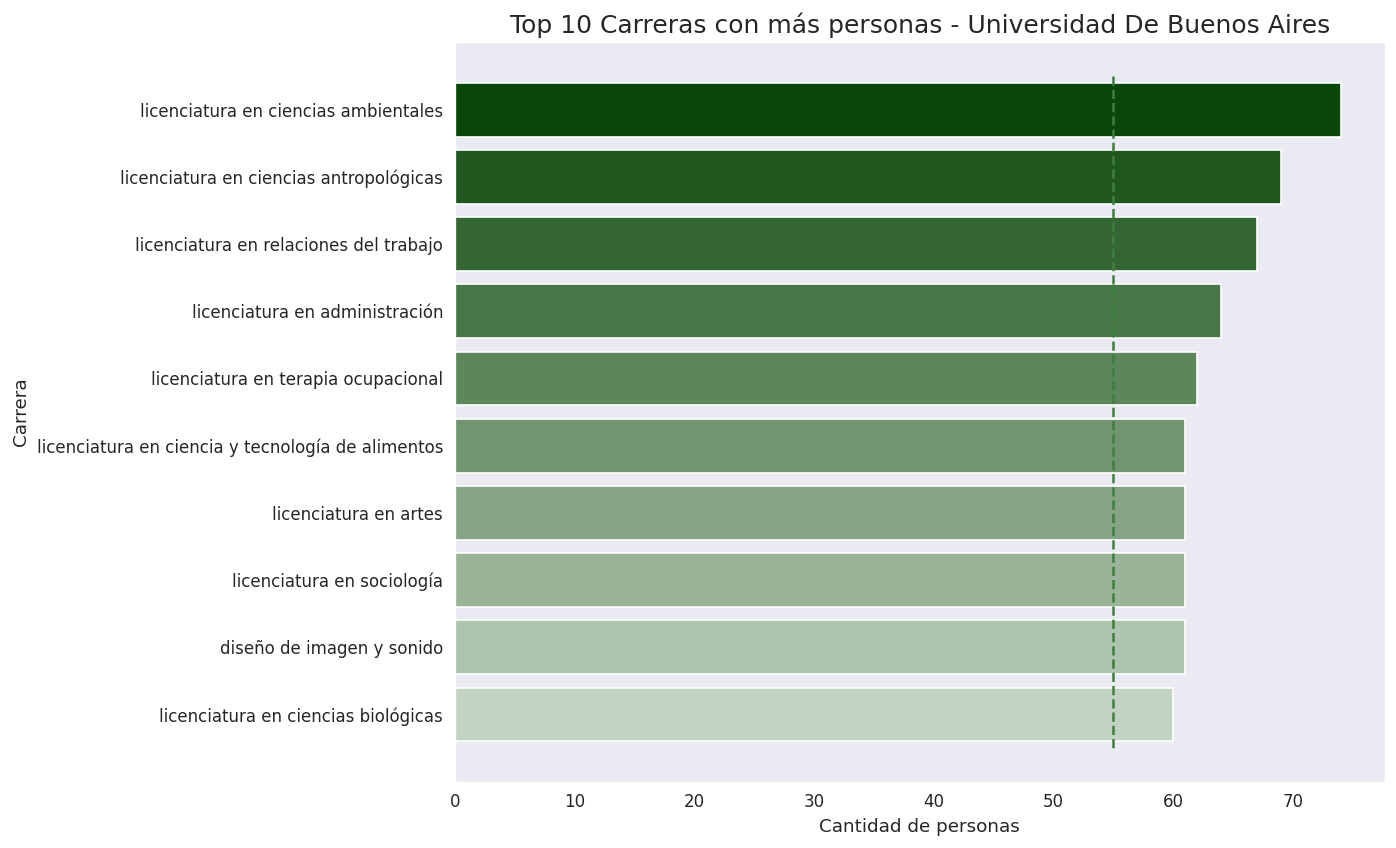

In [15]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

/tmp/ipykernel_4495/2552539824.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


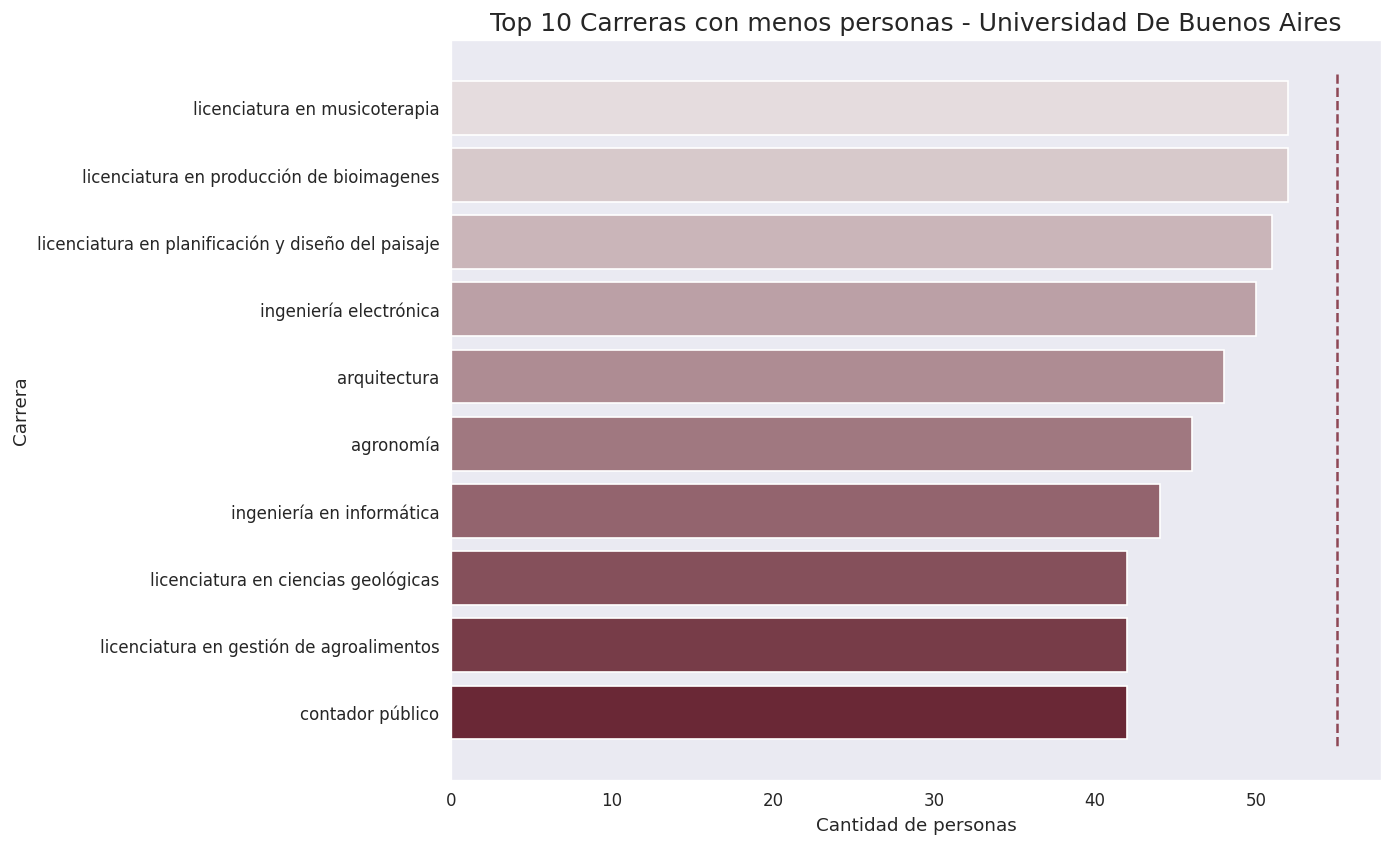

In [16]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

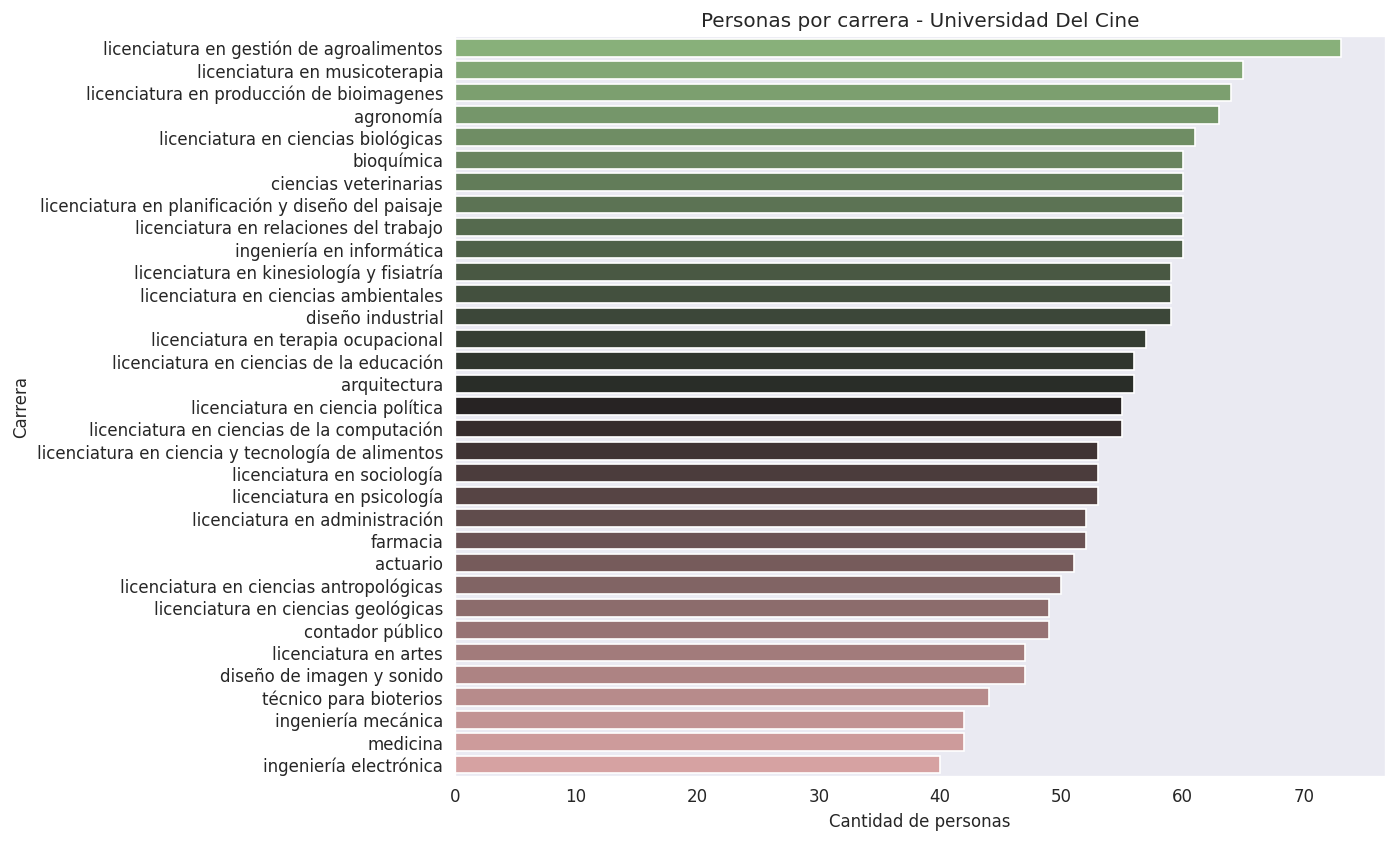

In [17]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

In [18]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [19]:
df_1.shape

(1844, 10)

In [20]:
df_1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad de buenos aires,actuario,2020-09-24,amy,wallace,female,1,8431,el hoyo,brookejones@yahoo.com
1,universidad de buenos aires,licenciatura en gestión de agroalimentos,2020-09-27,angela,hudson,female,17,3151,antelo,cpatterson@yahoo.com
2,universidad de buenos aires,medicina,2020-10-18,jessica,sandoval,female,77,6601,altamira,melinda04@hotmail.com
3,universidad de buenos aires,licenciatura en ciencias antropológicas,2020-09-20,david,cooper,male,93,6105,cañada seca,lukegutierrez@yahoo.com
4,universidad de buenos aires,licenciatura en kinesiología y fisiatría,2020-12-12,benjamin,nicholson,male,54,5345,baños termales,bgonzalez@hotmail.com


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1844 non-null   object
 1   career            1844 non-null   object
 2   inscription_date  1844 non-null   object
 3   first_name        1844 non-null   object
 4   last_name         1844 non-null   object
 5   gender            1844 non-null   object
 6   age               1844 non-null   int64 
 7   postal_code       1844 non-null   int64 
 8   location          1844 non-null   object
 9   email             1844 non-null   object
dtypes: int64(2), object(8)
memory usage: 158.5+ KB


In [22]:
df_1.describe()

,age,postal_code
count,1844.000000,1844.000000
mean,44.335141,4879.919197
std,30.541814,2235.950332
min,0.000000,1601.000000
25%,15.000000,3039.500000
50%,42.000000,4653.000000
75%,72.000000,6553.000000
max,99.000000,9421.000000


In [23]:
df_2.describe()

,age,postal_code
count,1806.000000,1806.000000
mean,58.237542,4731.353267
std,32.965365,2184.496296
min,1.000000,1601.000000
25%,30.000000,2913.000000
50%,58.000000,4191.000000
75%,87.000000,6409.000000
max,116.000000,9421.000000


<AxesSubplot: xlabel='gender', ylabel='age'>

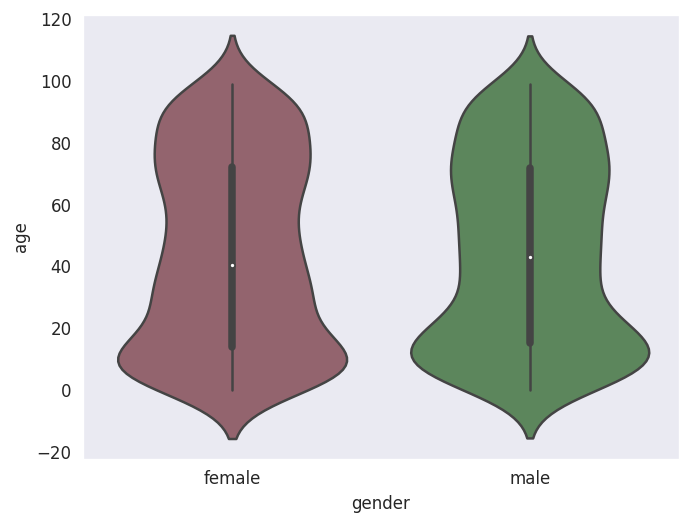

In [24]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

<AxesSubplot: xlabel='gender', ylabel='age'>

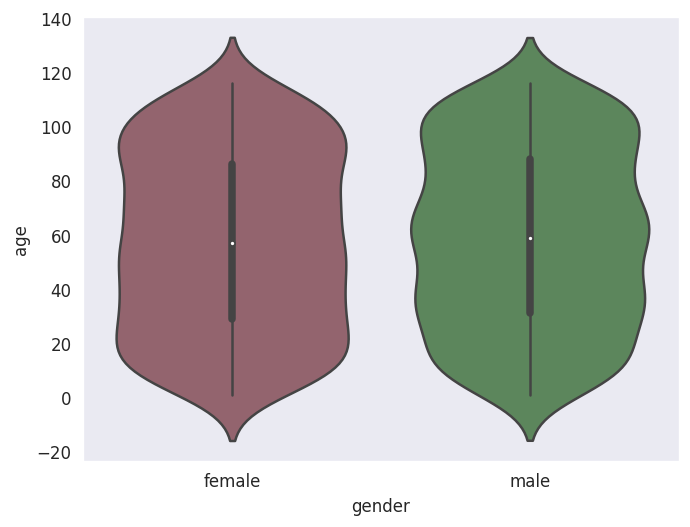

In [25]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

### top 10 localidades por alumnos

In [26]:
df_1.location.value_counts().head(10)

9 de julio             11
bella vista            10
agua colorada           8
buena vista             7
desvio kilometro 55     7
chovet                  6
algarrobo               6
albigasta               6
el porvenir             5
12 de octubre           5
Name: location, dtype: int64

In [27]:
df_2.location.value_counts().head(10)

buena vista                 8
atreuco                     7
alto verde                  7
9 de julio                  7
aromos                      6
agua colorada               6
carlos salas                6
dina huapi                  6
algarrobo                   6
barrio emir ramon juarez    5
Name: location, dtype: int64

### distribucion de alumnos por edad y género

<AxesSubplot: xlabel='age', ylabel='Density'>

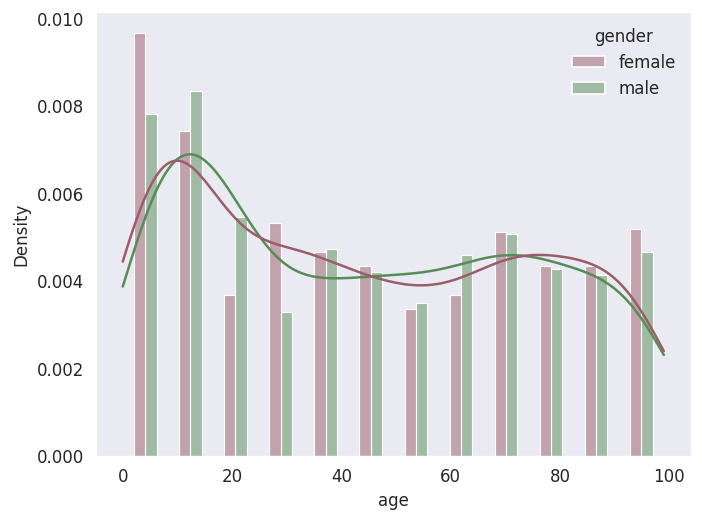

In [28]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])

<AxesSubplot: xlabel='age', ylabel='Density'>

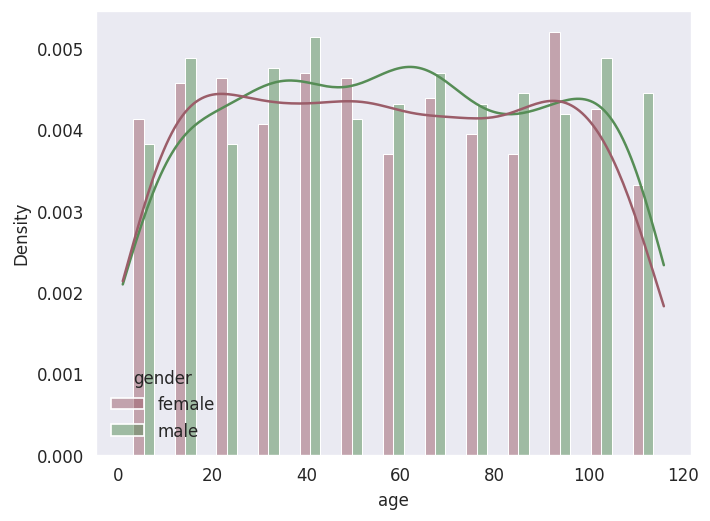

In [29]:
sns.histplot(data=df_2,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])

In [30]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)

### Segregación por tipo de carrera

In [31]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

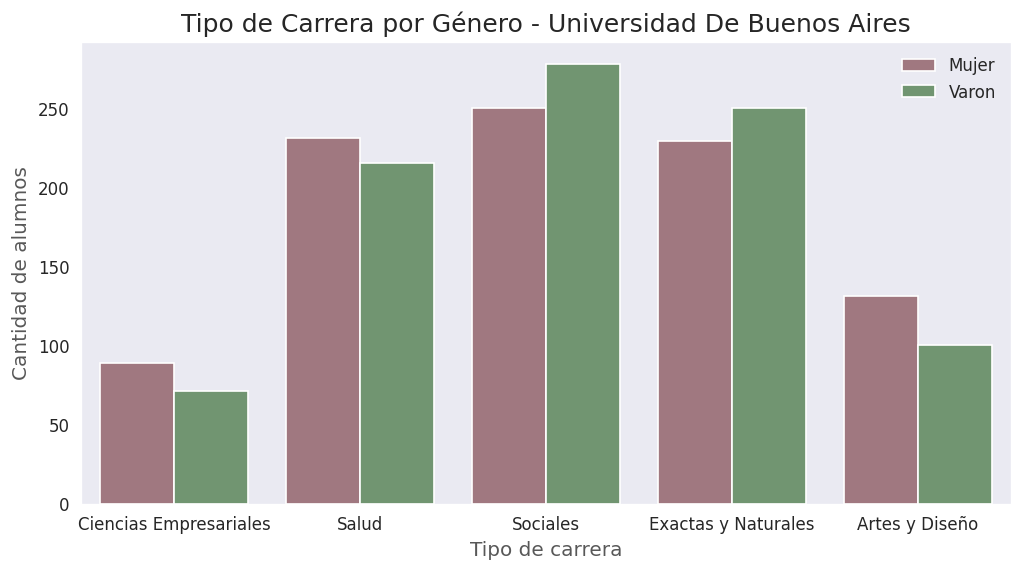

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


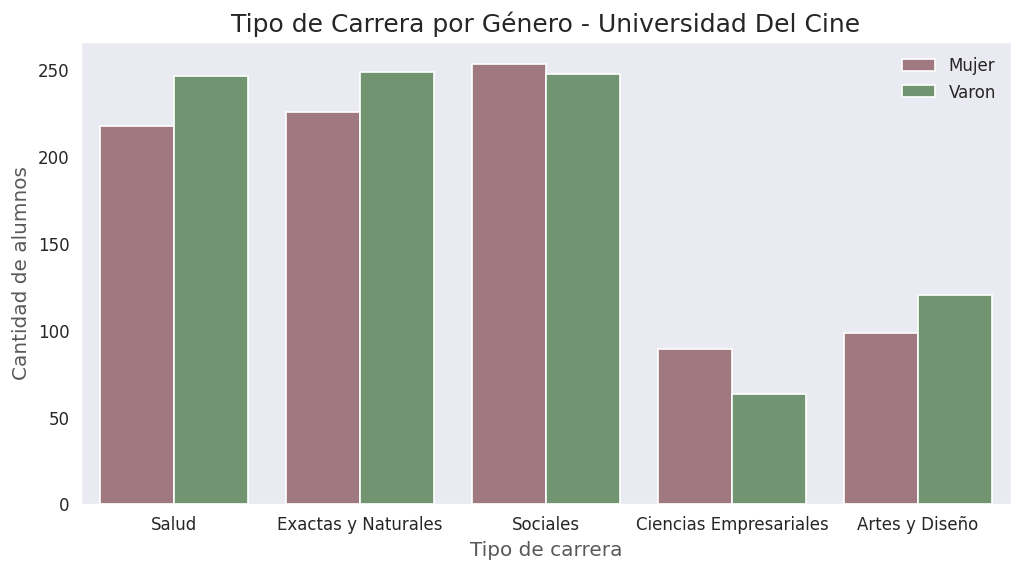

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


/tmp/ipykernel_4495/628117807.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


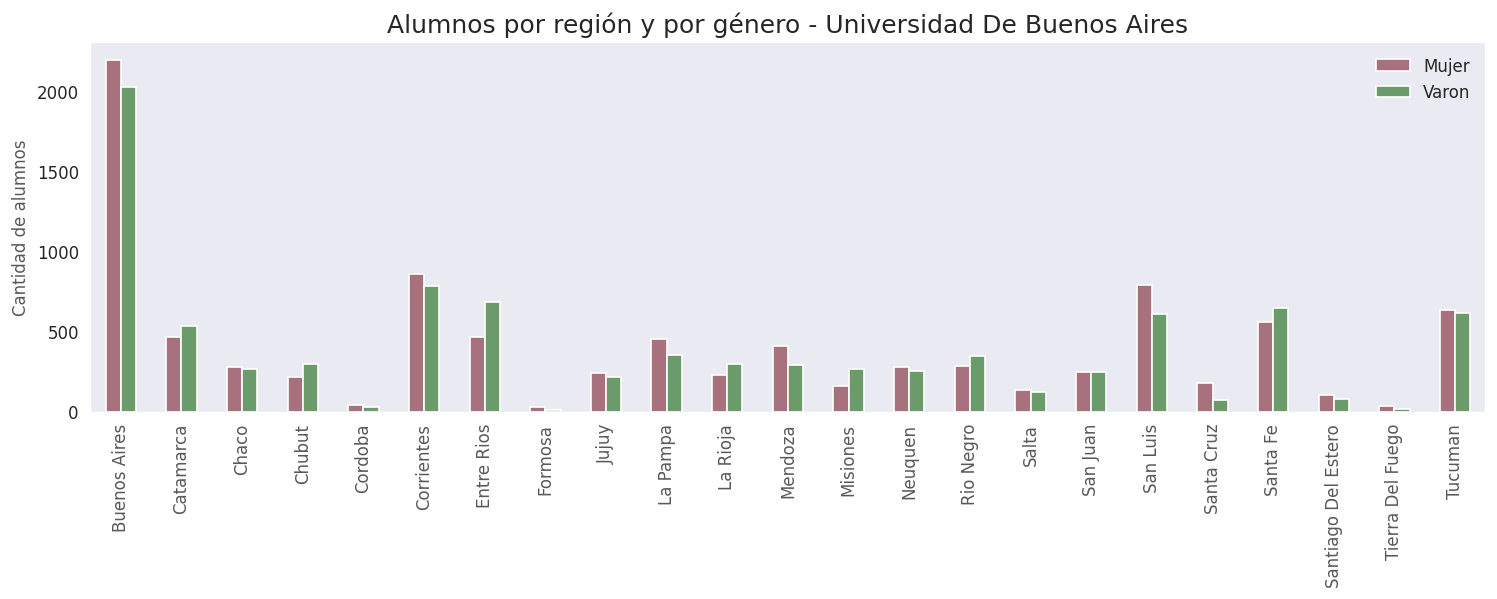

In [34]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

/tmp/ipykernel_4495/3414347959.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


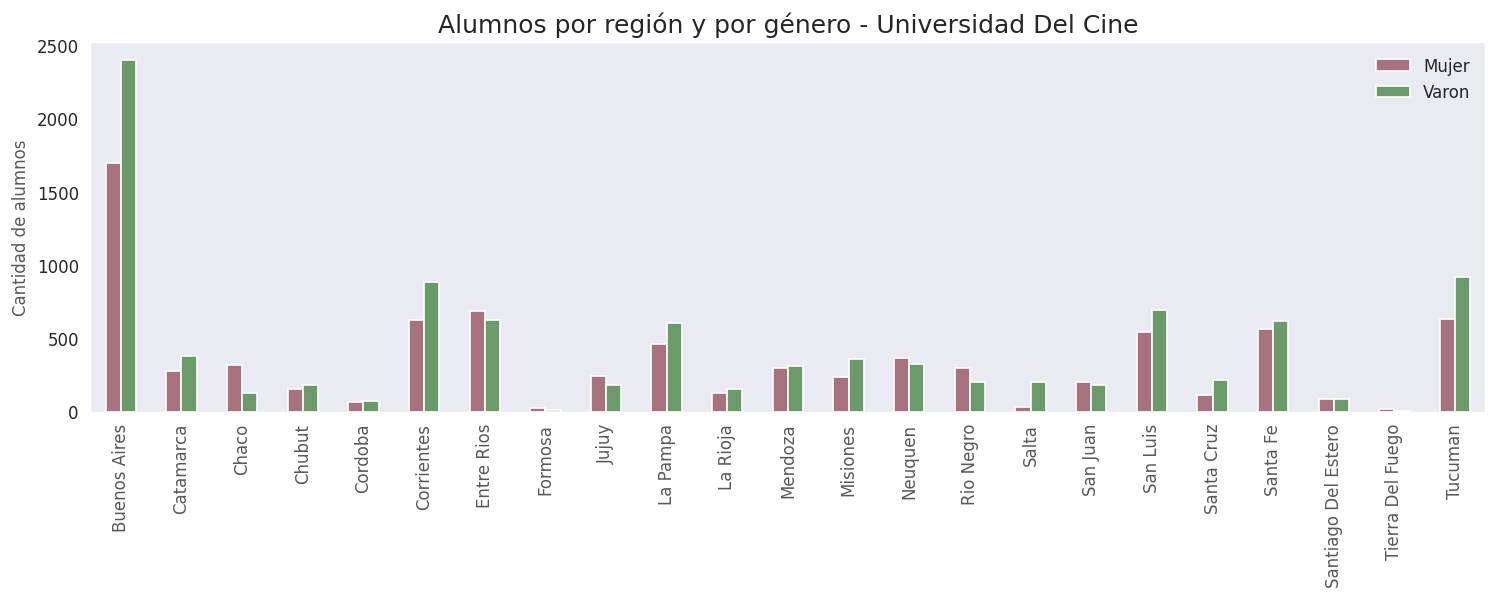

In [35]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

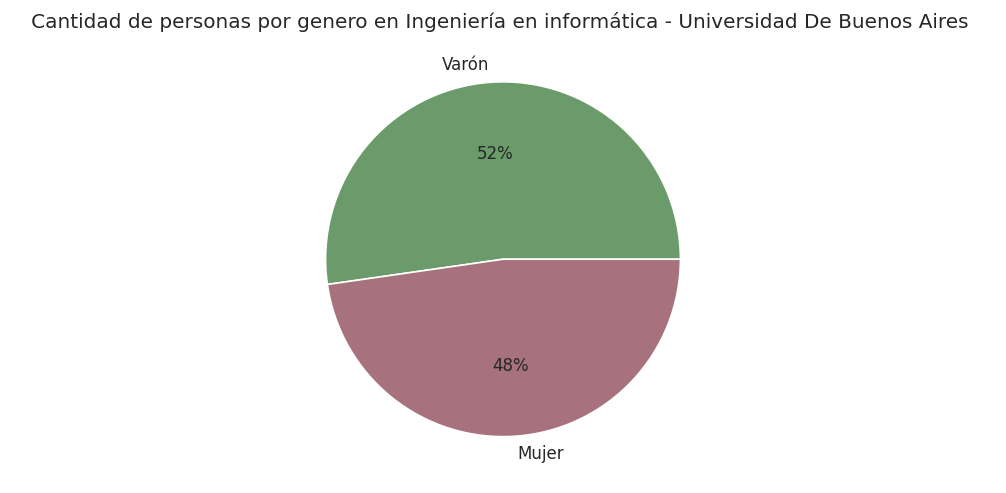

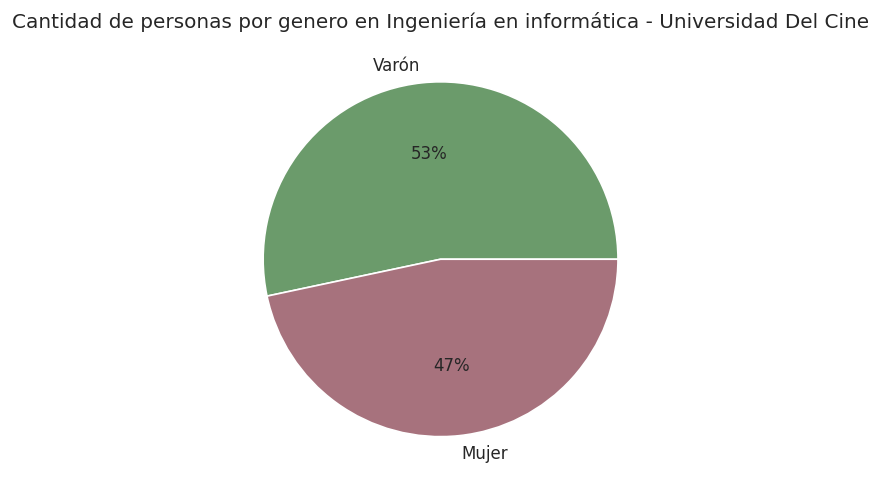

In [36]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


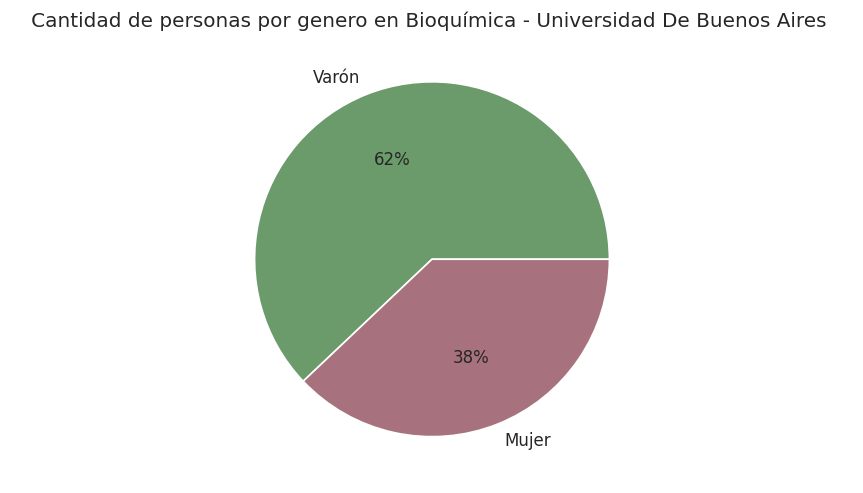

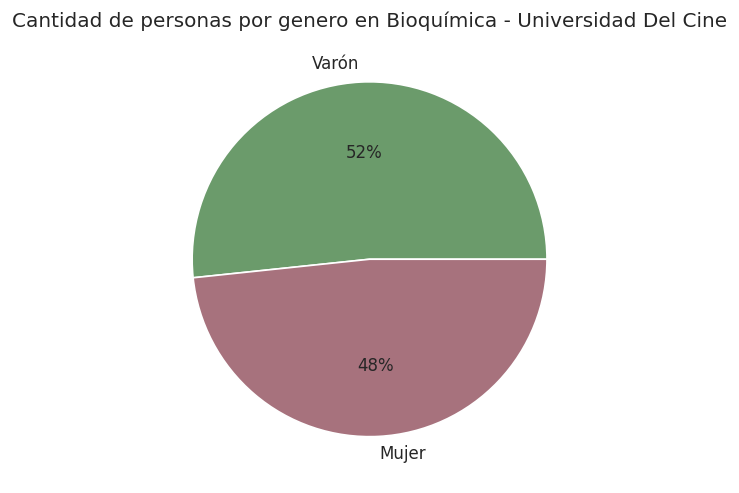

In [37]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

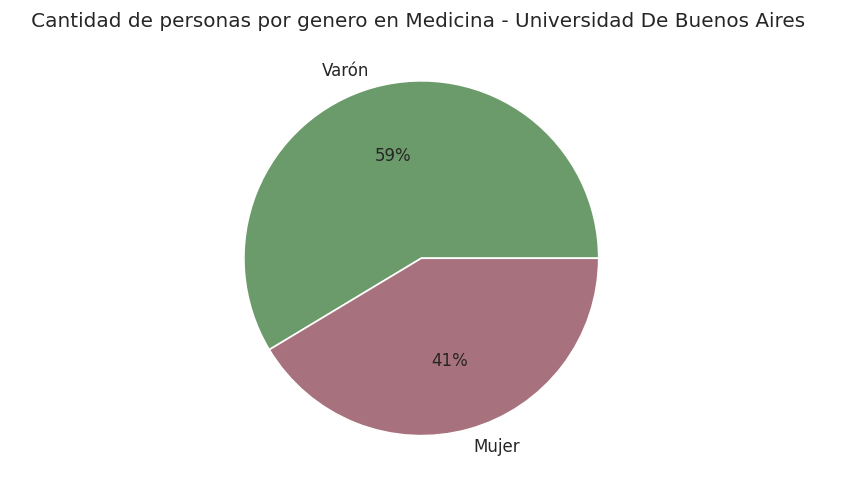

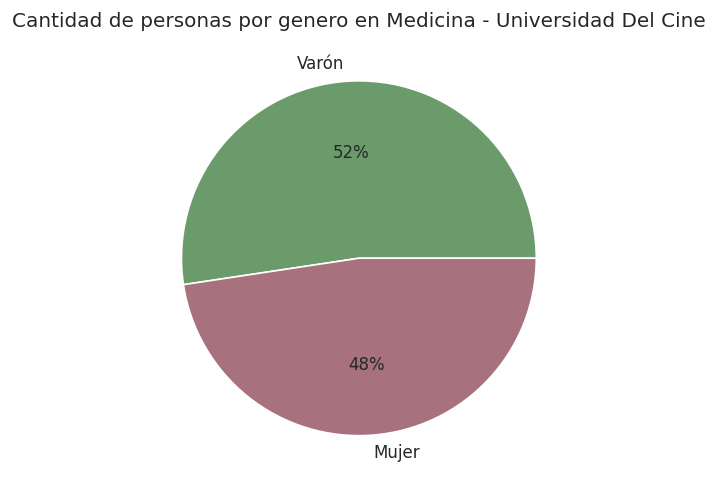

In [38]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()